## Worksheet to Practice Basic Pandas Functionality

---
Author: George Hong   

---  


In [1]:
import pandas as pd
import numpy as np

### Load Data
[Link to Original Data](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)      
[10 minutes to pandas (quickstart guide)](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#operations)

There is no header in the original data file.  Please load the file ```auto-mpg.data``` and add the proper label for each column.  The columns should be:   
```
'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'
```

Answers can be accessed by clicking the **...** buttons.

**Hint:** using ```vim```, you may notice that data is separated with variable whitespace length.  Try using ```\s+``` within your load function.



In [2]:
data = pd.read_csv('auto-mpg.data', sep='\s+', header=None)
data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

### Examining the Data
Examine the first and last three entries of your data.  Use the ```describe``` function.  Replace all instances of '?' with ```np.nan```. Afterwards, use ```dropna``` to remove any rows with missing data.  Are there any rows with missing data?



To-Do
- Examine the third column of the row with index 56
- Examine the 'acceleration' and 'weight' column of the row with index 40
- ```reindex``` your data, leaving out 'origin' and 'car name'.  Save as ```data_reindexed```
- Retrieve the 'mpg' column as a Series

In [3]:
data.head(3)
data.tail(3)
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
data = data.replace('?', np.nan)
data = data.dropna(how='any')

In [5]:
data.iloc[56, 3]
data.loc[40, ['acceleration', 'weight']]

acceleration    13.5
weight          4154
Name: 40, dtype: object

In [6]:
data_reindexed = data.reindex(index=data.index, columns=data.columns[[0, 1, 2, 3, 4, 5, 6, 7]])

In [7]:
data_mpg = data['mpg']
data_mpg 

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

### Slicing & Sorting



Please complete the following tasks

- Sort the full data by increasing value of 'acceleration'
    - Try to sort values by horsepower.  What happens?
- Create DataFrame with rows with indexes [1, 1, 2, 3, 5, 8, 13] and columns [0, 5, 6, 8]
- *Optional* Generalize the above indices, I guess.
- Add a column called 'power-to-weight' (ratio)
    - Calculate horsepower/weight for this new column

In [8]:
data.sort_values(by='mpg')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
28,9.0,8,304.0,193.0,4732.0,18.5,70,1,hi 1200d
26,10.0,8,307.0,200.0,4376.0,15.0,70,1,chevy c20
25,10.0,8,360.0,215.0,4615.0,14.0,70,1,ford f250
27,11.0,8,318.0,210.0,4382.0,13.5,70,1,dodge d200
124,11.0,8,350.0,180.0,3664.0,11.0,73,1,oldsmobile omega
...,...,...,...,...,...,...,...,...,...
326,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
325,44.3,4,90.0,48.00,2085.0,21.7,80,2,vw rabbit c (diesel)
329,44.6,4,91.0,67.00,1850.0,13.8,80,3,honda civic 1500 gl


In [9]:
data.sort_values(by='horsepower')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
256,20.5,6,225.0,100.0,3430.0,17.2,78,1,plymouth volare
199,20.0,6,225.0,100.0,3651.0,17.7,76,1,dodge aspen se
334,23.7,3,70.0,100.0,2420.0,12.5,80,3,mazda rx-7 gs
98,16.0,6,250.0,100.0,3278.0,18.0,73,1,chevrolet nova custom
99,18.0,6,232.0,100.0,2945.0,16.0,73,1,amc hornet
...,...,...,...,...,...,...,...,...,...
82,23.0,4,120.0,97.00,2506.0,14.5,72,3,toyouta corona mark ii (sw)
241,22.0,6,146.0,97.00,2815.0,14.5,77,3,datsun 810
174,18.0,6,171.0,97.00,2984.0,14.5,75,1,ford pinto
179,22.0,4,121.0,98.00,2945.0,14.5,75,2,volvo 244dl


In [10]:
data.iloc[[1, 1, 2, 3, 5, 8, 13], [0, 5, 6, 7]]

,mpg,acceleration,model year,origin
1,15.0,11.5,70,1
1,15.0,11.5,70,1
2,18.0,11.0,70,1
3,16.0,12.0,70,1
5,15.0,10.0,70,1
8,14.0,10.0,70,1
13,14.0,10.0,70,1


In [11]:
def fib(x):
    ret = [1, 1]
    if x == 0: return [0]
    if x == 1: return ret
    
    temp = 2
    while temp < x:
        val = ret[temp - 1] + ret[temp - 2]
        # Sweet, amortized O(1), just like an ArrayList
        ret.append(val)
        temp += 1
        # Return the list
    return ret

data.iloc[fib(10), [0, 5, 6, 7]]

,mpg,acceleration,model year,origin
1,15.0,11.5,70,1
1,15.0,11.5,70,1
2,18.0,11.0,70,1
3,16.0,12.0,70,1
5,15.0,10.0,70,1
8,14.0,10.0,70,1
13,14.0,10.0,70,1
21,24.0,14.5,70,2
35,17.0,15.5,71,1
56,26.0,20.5,71,1


We address the previous issue with 'horsepower' here.  Convert it from object to numeric.

In [12]:
data['power-to-weight'] = np.nan
data['horsepower'] = pd.to_numeric(data['horsepower'])
data['power-to-weight'] = data['horsepower']/data['weight']
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,power-to-weight
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0.037100
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0.044679
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0.043655
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0.043694
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0.040591
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,0.030824
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,0.024413
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,0.036601
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,0.030095


In [13]:
data.sort_values(by='horsepower')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,power-to-weight
19,26.0,4,97.0,46.0,1835.0,20.5,70,2,volkswagen 1131 deluxe sedan,0.025068
102,26.0,4,97.0,46.0,1950.0,21.0,73,2,volkswagen super beetle,0.023590
326,43.4,4,90.0,48.0,2335.0,23.7,80,2,vw dasher (diesel),0.020557
325,44.3,4,90.0,48.0,2085.0,21.7,80,2,vw rabbit c (diesel),0.023022
244,43.1,4,90.0,48.0,1985.0,21.5,78,2,volkswagen rabbit custom diesel,0.024181
...,...,...,...,...,...,...,...,...,...,...
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,0.050528
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,0.050847
95,12.0,8,455.0,225.0,4951.0,11.0,73,1,buick electra 225 custom,0.045445
13,14.0,8,455.0,225.0,3086.0,10.0,70,1,buick estate wagon (sw),0.072910


### Plotting
Using ```matplotlib.pyplot```, create a scatterplot of automobile horsepower versus number of cylinders.

In [14]:
import matplotlib.pyplot as plt

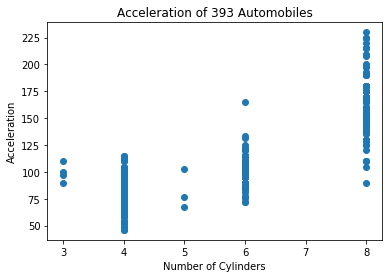

In [28]:
%matplotlib inline
plt.scatter(data['cylinders'], data['horsepower'])
plt.title("Acceleration of 393 Automobiles")
plt.xlabel("Number of Cylinders")
plt.ylabel("Acceleration")
plt.show()

### Shuffle Data & Save

Reorder the first 10 data points randomly.  Use slicing.

In [43]:
out = data.iloc[np.random.permutation(10), :]
out

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,power-to-weight
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,0.050847
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0.044679
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl,0.049351
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,0.045612
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0.040591
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0.043655
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,0.050528
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0.043694
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,0.049861
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0.037100


In [44]:
out.to_csv('output.csv')